In [6]:
from googletrans import Translator
translator = Translator(service_urls=['translate.google.com'])
translator.translate('Hola',src = 'es',dest = 'en').text
# <Translated src=ko dest=en text=Good evening. pronunciation=Good evening.>

# translator.translate('안녕하세요.', dest='ja')
# # <Translated src=ko dest=ja text=こんにちは。 pronunciation=Kon'nichiwa.>

# translator.translate('veritas lux mea', src='la')
# # <Translated src=la dest=en text=The truth is my light pronunciation=The truth is my light>

'Hello'

In [10]:
import googletrans
googletrans.LANGUAGES.keys()

dict_keys(['af', 'sq', 'am', 'ar', 'hy', 'az', 'eu', 'be', 'bn', 'bs', 'bg', 'ca', 'ceb', 'ny', 'zh-cn', 'zh-tw', 'co', 'hr', 'cs', 'da', 'nl', 'en', 'eo', 'et', 'tl', 'fi', 'fr', 'fy', 'gl', 'ka', 'de', 'el', 'gu', 'ht', 'ha', 'haw', 'iw', 'he', 'hi', 'hmn', 'hu', 'is', 'ig', 'id', 'ga', 'it', 'ja', 'jw', 'kn', 'kk', 'km', 'ko', 'ku', 'ky', 'lo', 'la', 'lv', 'lt', 'lb', 'mk', 'mg', 'ms', 'ml', 'mt', 'mi', 'mr', 'mn', 'my', 'ne', 'no', 'or', 'ps', 'fa', 'pl', 'pt', 'pa', 'ro', 'ru', 'sm', 'gd', 'sr', 'st', 'sn', 'sd', 'si', 'sk', 'sl', 'so', 'es', 'su', 'sw', 'sv', 'tg', 'ta', 'te', 'th', 'tr', 'uk', 'ur', 'ug', 'uz', 'vi', 'cy', 'xh', 'yi', 'yo', 'zu'])

In [ ]:
dir(TextBlob)

In [ ]:
blob = TextBlob("Hola mundo")

blob.translate()

In [75]:
# translate colormap
import cv2
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
diccolors = {
        cv2.COLORMAP_AUTUMN : 'autumn',
        cv2.COLORMAP_BONE : 'bone',
        cv2.COLORMAP_JET : 'jet',
        cv2.COLORMAP_WINTER : 'winter',
        cv2.COLORMAP_RAINBOW : 'rainbow',
        cv2.COLORMAP_OCEAN : 'ocean',
        cv2.COLORMAP_SUMMER : 'summer',
        cv2.COLORMAP_SPRING : 'spring',
        cv2.COLORMAP_COOL : 'cool',
        cv2.COLORMAP_HSV : 'hsv',
        cv2.COLORMAP_PINK : 'pink',
        cv2.COLORMAP_HOT : 'hot',
        cv2.COLORMAP_MAGMA : 'magma',
        cv2.COLORMAP_INFERNO : 'inferno',
        cv2.COLORMAP_PLASMA : 'plasma',
        cv2.COLORMAP_VIRIDIS : 'viridis',
        cv2.COLORMAP_CIVIDIS : 'cividis',
        cv2.COLORMAP_TWILIGHT : 'twilight',
        cv2.COLORMAP_TURBO : 'turbo',
}


def plot_color_gradients(category:str, cmap_list:list,
                         diagnosis:str = 'normal',translator:object = None, input: str = None,
                         width:int = 15, height:int = 12,fontsize:int = 10,):
    """
    Visualiza la importancia de las zonas de los mapas de saliencia

    Args:
        category (str): Nombre del título de escala
        cmap_list (list): lista dce escalas de color 
        diagnosis (str): predicción del diagnóstico
        translator (object): traductor del predictor
        input (str) : destino a clasificar
        width (int, optional): anchura de la paleta. Defaults to 15.
        height (int, optional): altura de la paleta. Defaults to 12.
        fontsize (int, optional): tamaño de la fuente. Defaults to 10.
    """    
    # Create figure and adjust figure height to number of colormaps
    cmaps = {}
    # Crear un linspace del o al 255
    gradient = np.linspace(0, 1, 256)
    gradient = np.vstack((gradient, gradient))


   
    # CRear una figura de cierto tamaño
    figh = 0.35 + 0.15 + (height + (height - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=height + 1, figsize=(width, height))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)


    # Set of description
    weak = f'unlikely {diagnosis} zone'
    mid = f'possible {diagnosis} zone'
    imp = f'probable {diagnosis} zone'
    est = f'{diagnosis} zone detected'

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax.text(-0.01, 0.5, name, va='top', ha='right', fontsize=fontsize,
                transform=ax.transAxes)
                # Labels
        ax.text(0.25, -0.1, weak, va='top', ha='right', fontsize=fontsize,
                transform=ax.transAxes)
        ax.text(0.5, -0.1, mid, va='top', ha='right', fontsize=fontsize,
                transform=ax.transAxes)
        ax.text(0.75, -0.1, imp, va='top', ha='right', fontsize=fontsize,
                transform=ax.transAxes)
        ax.text(1, -0.1, est, va='top', ha='right', fontsize=fontsize,
                transform=ax.transAxes)
    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

In [73]:

def plot_color_gradient(category:str, name:str,
                         diagnosis:str = 'normal',translator:object = None, input: str = None,
                         width:int = 15, height:int = 12,fontsize:int = 10,):
        """
        Visualiza la importancia de las zonas de los mapas de saliencia

        Args:
                category (str): Nombre del título de escala
                cmap_list (list): lista dce escalas de color 
                diagnosis (str): predicción del diagnóstico
                translator (object): traductor del predictor
                input (str) : destino a clasificar
                width (int, optional): anchura de la paleta. Defaults to 15.
                height (int, optional): altura de la paleta. Defaults to 12.
                fontsize (int, optional): tamaño de la fuente. Defaults to 10.
        """    
        # Create figure and adjust figure height to number of colormaps
        cmaps = {}
        # Crear un linspace del o al 255
        gradient = np.linspace(0, 1, 256)
        gradient = np.vstack((gradient, gradient))


        
        # CRear una figura de cierto tamaño
        figh = 0.35 + 0.15 + (height + (height - 1) * 0.1) * 0.22
        fig,ax = plt.subplots(1,1,figsize=(width, height))
        fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                                left=0.2, right=0.99)
        plt.title(f'{category}', fontsize=14)

        # Set of description
        weak = f'unlikely {diagnosis} zone'
        mid = f'possible {diagnosis} zone'
        imp = f'probable {diagnosis} zone'
        est = f'{diagnosis} zone detected'

        plt.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        plt.text(-0.01, 0.5, name, va='top', ha='right', fontsize=fontsize,
                transform = ax[0].trans)
                # Labels
        plt.text(0.25, -0.1, weak, va='top', ha='right', fontsize=fontsize,
                )
        plt.text(0.5, -0.1, mid, va='top', ha='right', fontsize=fontsize,
                )
        plt.text(0.75, -0.1, imp, va='top', ha='right', fontsize=fontsize,
                )
        plt.text(1, -0.1, est, va='top', ha='right', fontsize=fontsize,
                )
    
        # # Turn off *all* ticks & spines, not just the ones with colormaps.
        # for ax in axs:
        #         ax.set_axis_off()
        

        # Save colormap list for later.
        cmaps[category] = name

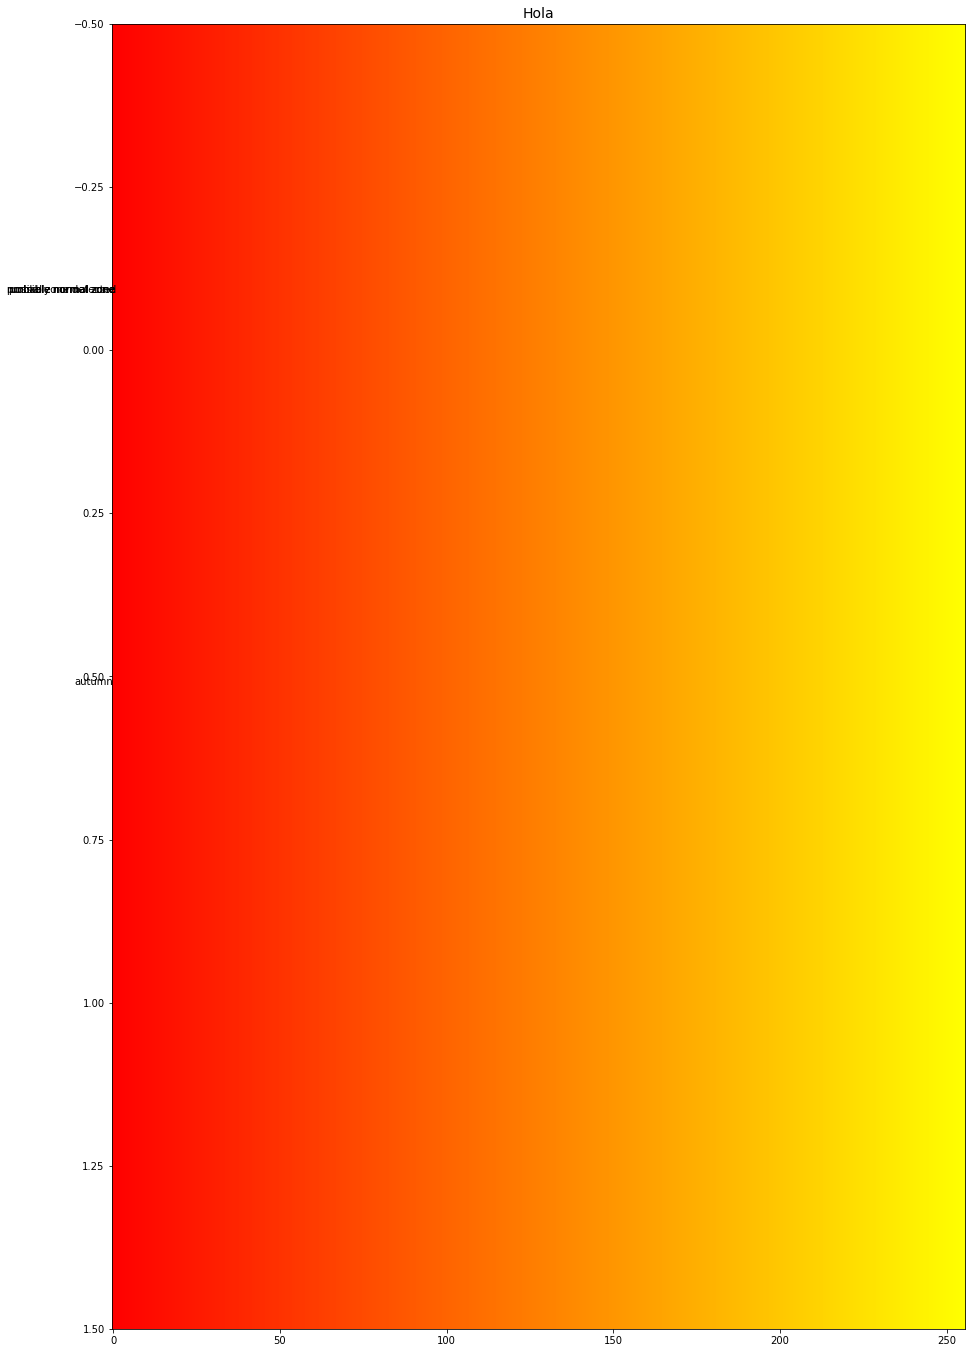

In [74]:
plot_color_gradient('Hola', list(diccolors.values())[0],width = 15, height = 20,fontsize = 10)


In [24]:
import plotly.express as px
from skimage import io
data = io.imread("https://github.com/scikit-image/skimage-tutorials/raw/main/images/cells.tif")
img = data[25:40]
fig = px.imshow(img, animation_frame=0, binary_string=True, labels=dict(animation_frame='pathology'))
fig.show()

In [1]:
import numpy as np
import plotly.graph_objs as go

N = 50
M = np.random.random((N, 7, 7))
labels=['A','B','C','D','D','F','G']
window_length=5

fig = go.Figure()

for step in range(N):
      fig.add_trace(
            go.Heatmap(x=labels,y=labels,z=M[step]))


fig.data[10].visible = True
print(len(fig.data))
# Create and add slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
        {"title": "Time: " + str(window_length*i)+' sec'}],)
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)
sliders = [dict(
    active=0,
    currentvalue={"prefix": "Time "},
    pad={"t": 5},
    steps=steps
)]
fig.update_layout(
    sliders=sliders)

fig.show()

50


In [3]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import numpy as np

imgR = np.random.rand(20, 40)

fig = make_subplots(rows=1, cols=2)
x = [1, 2, 3, 4, 5]
y = [4, 5, 6, 7, 8]

fig.add_trace(go.Scatter(x=[1, 2, 3, 4, 5], y=[4, 5, 6, 7, 8]), row=1, col=1)
fig.add_trace(px.imshow(imgR).data[0], row=1, col=2)

frames = []
for i in range(5):
    if i > 0:
        np.random.shuffle(x)
        np.random.shuffle(y)
    # need to name the frame for slider, plus make sure both traces are using
    # correct axes
    frames.append(
        go.Frame(
            name=str(i),
            data=[
                go.Scatter(x=x, y=y),
                px.imshow(np.random.rand(20, 40) if i > 0 else imgR)
                .update_traces(xaxis="x2", yaxis="y2")
                .data[0],
            ],
        )
    )

# now have all parts to puild figure
figa = go.Figure(data=fig.data, frames=frames, layout=fig.layout)

# add slider
figa.update_layout(
    sliders=[
        {
            "active": 0,
            "currentvalue": {"prefix": "animation_frame="},
            "len": 0.9,
            "steps": [
                {
                    "args": [
                        [fr.name],
                        {
                            "frame": {"duration": 0, "redraw": True},
                            "mode": "immediate",
                            "fromcurrent": True,
                        },
                    ],
                    "label": fr.name,
                    "method": "animate",
                }
                for fr in figa.frames
            ],
        }
    ],
)

In [6]:
import plotly.express as px

df = px.data.gapminder()
text = df.groupby("year").pop.mean().astype(int).values

fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country", 
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])\
        .update_layout(
#                        title="Avg Population: {}".format(text[0]), 
                       title_x=0.5)


# for i, frame in enumerate(fig.frames):
#     frame.layout.title = "Avg Population: {}".format(text[i])
    
# for step in fig.layout.sliders[0].steps:
#     step["args"][1]["frame"]["redraw"] = True

In [7]:
fig.show()